### **Density plot of 1,000 people's life spans, facetted by smokers 繪圖**

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 設定字型
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 設定中文字型，這裡以微軟正黑體為例
plt.rcParams['axes.unicode_minus'] = False  # 解決負號'-'顯示為方塊的問題


In [54]:
# 讀取 CSV 檔案
file = pd.read_csv("D:\Programming\大四下 - 統計預測與機器學習\Homework 1\longevity.csv")

print(file['Smokes'].value_counts())
file['Smokes'] = file['Smokes'].replace({0: 'No', 1: 'Yes'})


Smokes
1    500
0    500
Name: count, dtype: int64


In [55]:
# 檢查數據是否有缺失值
print(file['AgeAtDeath'].isna().sum())  # 檢查 AgeAtDeath 中的 NaN 數量
print(file['Smokes'].isna().sum())      # 檢查 Smokes 中的 NaN 數量


0
0


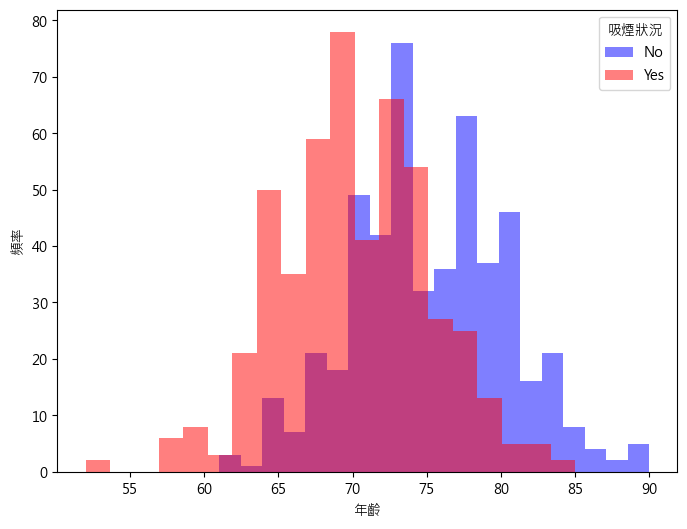

In [56]:
# 散點圖

plt.figure(figsize=(8, 6))
colors = {"No": 'blue', "Yes": 'red'}  # 0 代表不吸煙，1 代表吸煙

for smoke_status, data in file.groupby('Smokes'):
    plt.hist(data['AgeAtDeath'], bins=20, alpha=0.5, label=smoke_status, color=colors[smoke_status])

plt.xlabel('年齡')
plt.ylabel('頻率')

# 設置圖例標題
legend = plt.legend(title='吸煙狀況')

plt.show()


### **Baseline Model - MSE 繪圖**

1. 使用單一猜測值 guess 計算預測誤差 MSE。
2. 通過迴圈測試一系列猜測值（63 到 83），計算每個猜測值的 MSE。
3. 將結果存入 DataFrame，並繪製猜測值與誤差的關係圖。
4. 展示不同猜測值的預測性能，幫助找到最佳猜測值（即誤差最小的值）。


In [57]:
# 計算 MSE
guess = 73
mean_squared_diff = ((file["AgeAtDeath"] - guess) ** 2).mean()
print("當猜測為 73 歲時，MSE 值為 = " , mean_squared_diff)


當猜測為 73 歲時，MSE 值為 =  32.991


In [58]:
# 創建一個空的 DataFrame 來存儲結果
guess_accuracy = pd.DataFrame(columns=['Guess', 'Error'])

# 使用迴圈計算不同猜測值的預測誤差
for guess in range(63, 84):
    prediction_error = ((file['AgeAtDeath'] - guess) ** 2).mean()
    new_row = pd.DataFrame({'Guess': [guess], 'Error': [prediction_error]})

    # 如果 guess_accuracy 是空的，則將新的 DataFrame 賦值給 guess_accuracy
    if guess_accuracy.empty:
        guess_accuracy = new_row
    else:
        guess_accuracy = pd.concat([guess_accuracy, new_row], ignore_index=True)

print(guess_accuracy) # 展示每個猜測值及其 MSE。


    Guess    Error
0      63  127.451
1      64  109.005
2      65   92.559
3      66   78.113
4      67   65.667
5      68   55.221
6      69   46.775
7      70   40.329
8      71   35.883
9      72   33.437
10     73   32.991
11     74   34.545
12     75   38.099
13     76   43.653
14     77   51.207
15     78   60.761
16     79   72.315
17     80   85.869
18     81  101.423
19     82  118.977
20     83  138.531


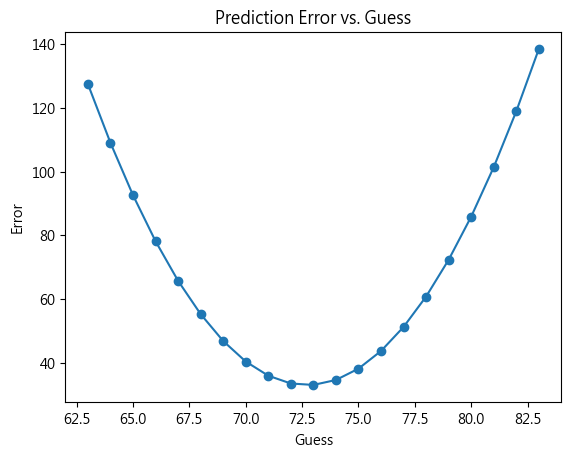

In [59]:
# 繪製猜測值與誤差的關係圖

plt.plot(guess_accuracy['Guess'], guess_accuracy['Error'], marker='o', linestyle='-')
plt.xlabel('Guess')
plt.ylabel('Error')
plt.title('Prediction Error vs. Guess')
plt.show()
# 圖表中的最低點對應 MSE 最小的猜測值，通常接近 file['AgeAtDeath'].mean()


### **Regression Using Dummy Variables**

1. 計算所有人的平均死亡年齡 AgeAtDeath 作為基準猜測，並計算其 RMSE。
2. 根據吸煙狀態 Smokes 將數據分為吸煙者和非吸煙者，分別計算平均死亡年齡作為預測值。
3. 比較基準模型（整體平均值）和分組模型（根據吸煙狀態）的 RMSE，評估是否考慮吸煙狀態能提高預測準確性。
    - 基準模型：用整體平均年齡預測所有人的死亡年齡，計算 RMSE。
    - 分組模型：根據吸煙狀態分成兩組，計算各自均值作為預測值，並計算 RMSE。
    
4. 比較：
    - 輸出兩種模型的 RMSE，評估是否考慮吸煙狀態能改進預測。
    - 若 error_new_prediction < error_constant_guess，說明考慮吸煙狀態能提高預測準確性。

In [60]:
# 基準模型：計算整體平均年齡的 RMSE
constant_guess = file['AgeAtDeath'].mean()
error_constant_guess = np.sqrt(((file['AgeAtDeath'] - constant_guess) ** 2).mean())

# 分組模型：根據 'Yes' 和 'No' 計算吸煙者和非吸煙者的平均年齡
smokers_guess = file[file['Smokes'] == 'Yes']['AgeAtDeath'].mean()
non_smokers_guess = file[file['Smokes'] == 'No']['AgeAtDeath'].mean()

# 將預測值應用到新欄位
# np.where(condition, value_if_true, value_if_false)
file['NewPrediction'] = np.where(file['Smokes'] == 'No', non_smokers_guess, smokers_guess)


In [66]:
# 計算新預測值的預測誤差
error_new_prediction = np.sqrt(((file['AgeAtDeath'] - file['NewPrediction']) ** 2).mean())

print("RMSE without smoking:", error_constant_guess)
print("RMSE with smoking:", error_new_prediction)


RMSE without smoking: 5.737096042424251
RMSE with smoking: 5.148622145778422


### **Result**

- 如果用整體平均年齡預測每個人的死亡年齡，平均誤差大約是 5.74 年
- 分組模型與基準模型相比，誤差減少了約 0.588 年（5.737 - 5.149）-> 考慮吸煙狀態後，預測的準確性有所提高。
- 兩者誤差減少了大約 10.3%，顯示吸煙狀態對死亡年齡有一定的影響
